# OBerA: Detecting changeover in SMEs
## Practical Lab

## **Foreword**
Hi there! It's been a long way for you and we hope you have been enjoying it so far 😃

It is time to face another challenge: you will be working with our REAL data set (fun fact: *dataset* is also a correct way of spelling this word).
This data set is a part of our OBerA project with which you were introduced during the lecture. If, for whatever reason you missed it, in short, OBerA is all about automatic detection of the changeover in production at SMEs using Machine Learning... or Deep Learning... or whatver works best in the end! 😉

While we are giving you tasks and some guidance in this lab, please, feel free to experiment and use whatever ML concepts, tools and approaches you want.

**And, as usual, here's the DISCLAIMER**:

This lab relies on Python heavily. Therefore, here is a piece of advice -- **documentation is your best friend!** Next, you go to **Google** and **Stack Overflow** or other boards.

*A properly formulated Google search query can save you tons of time.*

There are no overly complicated Python concepts in here like OOP or even loops are rare if any. Yet, you are free to use whatever methods, functions and libraries you want to reach the result.

Tips and suggestions for the libraries will be provided. Additional **HINTS** may be found throughout the lab.

Good luck!

**(You can use whatever libraries you are comfortable with. The list below is just a recommendation.)**

For this we would use the following libraries:

- `pandas` for building dataframes from .csv files and data manipulation
- `numpy` for working with arrays and matrices
- `matplotlib` as the backend for data visualization
- `seaborn` as the frontend for data visualization
- `scikit-learn` a.k.a. `sklearn` for machine learning

In [ ]:
# import the above-mentioned libraries following the convention
# naturally you can tweak these imports to your own preference
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Now below you see a dataframe you will be working with. However, this table is in Markdown and you cannot manipulate it  in Python directly. For this you are provided with a .csv file called `Changeover_Pabst_full.csv` which will help you to build the same dataframe using `pandas`.

|    | DATETIME            |   Distance |   Power |   Liter |   V1 |   V2 |       X |        Y |   Phase |   Phase_compressed |   Production |
|---:|:--------------------|-----------:|--------:|--------:|-----:|-----:|--------:|---------:|--------:|-------------------:|-------------:|
|  0 | 2021-03-31 06:58:28 |    20.0625 | 3278.44 |       0 |    0 |    0 | 1.206   | 1.14237  |       1 |                  1 |            0 |
|  1 | 2021-03-31 06:58:29 |    20.0625 | 3292.48 |       0 |    0 |    0 | 1.34665 | 1.05209  |       1 |                  1 |            0 |
|  2 | 2021-03-31 06:58:30 |    20.0625 | 3289.74 |       0 |    0 |    0 | 1.40644 | 0.724651 |       1 |                  1 |            0 |
|  3 | 2021-03-31 06:58:31 |    20.0625 | 3282.73 |       0 |    0 |    0 | 1.22965 | 0.543206 |      20 |                  4 |            0 |
|  4 | 2021-03-31 06:58:33 |    20.0625 | 3288.57 |       0 |    0 |    0 | 1.13673 | 0.377431 |      20 |                  4 |            0 |

Dataset charaacteristics:

- DATETIME is a timestamp of each entry. There are gaps between them as entries which were missing either sensor data were dropped. (timestamp)
- Distance respresents the door sensor of the tool magazine. If it shows around 20 cm it means that the door is closed. If the distance is much greater than 20 cm it means that the door was opened. (cm)
- Power is the operating power of the machine (in Watts).
- Liter shows the flow of coolant in the machine (L/min)
- V1 is the door sensor of the main chamber of the machine where production and some stages of changeover happen. 0 -- door is closed. 1 -- door is open. V1 is because the sensor is called Velleman(1).
- V2 is the door sensor of the changeover chamber of the machine. No production happens in this chamber, only changeover. 0 -- door is closed. 1 -- door is open. V2 is because the sensor is called Velleman(2).
- X and Y represent the local geo coordinates that are obtained from a local-GPS beacon worn by the machine operator.
- Phase and Phase_compressed stand for various phases of changeover. **These two columns are irrelevant to you since we are doing binary classification here**.
- Production shows whether machine is currently producing parts or undergoing changeover. 0 -- stands for changeover (no production). 1 -- is production (no changeover). 

<span style="color:red"> IMPORTANT: </span> We are doing a binary classification here.

## General task

So, all in all, we want our model to detect whether the machine is undergoing changeover or not -- `Production` column value 0 or 1. Hence binary classification. We need to use other features for that. Columns "Phase" and "Phase_compressed" are of ***NO*** interest to us and shall be dropped.
Yet, to drop anything we should import something first ;)

## Data Understanding

### Task 1.1. Load data from CSV file

Now use `pd.read_csv()` function to read the csv into the pandas dataframe. Please, refer to `pandas` documentation if needed or here is the link to [`read_csv()` function documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). 

Call your dataframe `df`.

In [ ]:
# Upload information file Changeover_Pabst_full.csv
url='https://drive.google.com/file/d/10zST0kAqhTK_I780gxvY_91VYzZVk4TY/view?usp=sharing'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(path)

Double-click **here** for the solution.

<!-- Your answer is below:
    
df = pd.read_csv("Changeover_Pabst_full.csv")

-->

In [ ]:
#check the resulting data frame and its first 5 rows
df = pd.read_csv("Changeover_Pabst_full.csv")
df.head()

,DATETIME,Distance,Power,Liter,V1,V2,X,Y,Phase,Phase_compressed,Production
0,2021-03-31 06:58:28,20.0625,3278.44,0,0,0,1.20600,1.142370,1,1,0
1,2021-03-31 06:58:29,20.0625,3292.48,0,0,0,1.34665,1.052090,1,1,0
2,2021-03-31 06:58:30,20.0625,3289.74,0,0,0,1.40644,0.724651,1,1,0
3,2021-03-31 06:58:31,20.0625,3282.73,0,0,0,1.22965,0.543206,20,4,0
4,2021-03-31 06:58:33,20.0625,3288.57,0,0,0,1.13673,0.377431,20,4,0


You should see a dataframe that looks similar to this one below (the same you saw above)

|    | DATETIME            |   Distance |   Power |   Liter |   V1 |   V2 |       X |        Y |   Phase |   Phase_compressed |   Production |
|---:|:--------------------|-----------:|--------:|--------:|-----:|-----:|--------:|---------:|--------:|-------------------:|-------------:|
|  0 | 2021-03-31 06:58:28 |    20.0625 | 3278.44 |       0 |    0 |    0 | 1.206   | 1.14237  |       1 |                  1 |            0 |
|  1 | 2021-03-31 06:58:29 |    20.0625 | 3292.48 |       0 |    0 |    0 | 1.34665 | 1.05209  |       1 |                  1 |            0 |
|  2 | 2021-03-31 06:58:30 |    20.0625 | 3289.74 |       0 |    0 |    0 | 1.40644 | 0.724651 |       1 |                  1 |            0 |
|  3 | 2021-03-31 06:58:31 |    20.0625 | 3282.73 |       0 |    0 |    0 | 1.22965 | 0.543206 |      20 |                  4 |            0 |
|  4 | 2021-03-31 06:58:33 |    20.0625 | 3288.57 |       0 |    0 |    0 | 1.13673 | 0.377431 |      20 |                  4 |            0 |

### Task 1.2. Checking the shape of the dataframe

Hopefully, the import was successful and now we can check the shape of our dataframe. We will use `.shape` attribute of pandas DataFrame for this. [Documentation here.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html)

In [ ]:
#YOUR CODE HERE
df.shape

(9986, 11)

Double-click **here** for the solution.

<!-- Your answer is below:
    
df.shape

-->

The answer you get should be `(9986, 11)`.

### Task 1.3. Check the data types of each column

To be able to work with and analyze our data we need to know its types and see if we need to do any conversions.
Just like in the task 1.2 you will use another attribute called `.dtypes` this time.

In [ ]:
#YOUR CODE HERE
df.dtypes

DATETIME             object
Distance            float64
Power               float64
Liter                 int64
V1                    int64
V2                    int64
X                   float64
Y                   float64
Phase                 int64
Phase_compressed      int64
Production            int64
dtype: object

Double-click **here** for a **HINT**.

<!-- Your hint is below:
    
Come on, the task is trivial! Look at the Task 1.2 and use .dtypes instead of .shape

-->

### Task 1.4. Changing data types

We can assume the result you got looks close to this:

- <span style="color:yellow"> DATETIME             object </span>
- Distance            float64
- Power               float64
- Liter                 int64
- V1                    int64
- V2                    int64
- X                   float64
- Y                   float64
- Phase                 int64
- Phase_compressed      int64
- Production            int64
- dtype: object

You can see that most of the data has the correct type except for DATETIME which was classified as an object. To be able to do some filtering later, we would want this column in *datetime* format.

**NOTE:** It could happen that in your case the DATETIME column was already classified as datetime. If so -- you are lucky and can skip this step. But if it isn't the case --> let's go ahead and convert it.

The easiest way to do this is to use `pandas.to_datetime()`. [Documentation here.](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)
After you changed it -- check the `.dtypes` again.

In [ ]:
#YOUR CODE HERE
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

Double-click **here** for the solution.

<!-- Your answer is below:
    
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

-->

### Task 1.5. Drop  unnecessary columns

If you read the description of our data, you know that columns "Phase" and "Phase_compressed" are not needed, so let's drop them using `.drop()` method. [Documentation here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

**HINT:** Do not forget about "axis" and "inplace" arguments.

In [ ]:
#YOUR CODE HERE
df.drop(['Phase','Phase_compressed'],axis=1,inplace=True)
df.head()

,DATETIME,Distance,Power,Liter,V1,V2,X,Y,Production
0,2021-03-31 06:58:28,20.0625,3278.44,0,0,0,1.20600,1.142370,0
1,2021-03-31 06:58:29,20.0625,3292.48,0,0,0,1.34665,1.052090,0
2,2021-03-31 06:58:30,20.0625,3289.74,0,0,0,1.40644,0.724651,0
3,2021-03-31 06:58:31,20.0625,3282.73,0,0,0,1.22965,0.543206,0
4,2021-03-31 06:58:33,20.0625,3288.57,0,0,0,1.13673,0.377431,0


Double-click **here** for the solution.

<!-- Your answer is below:
    
df.drop(['Phase', 'Phase_compressed'], axis=1, inplace=True)

-->

### Task 1.6. Data Visualization.

Before you jump to data visualization, you might want to have a preliminary look at your data using `.describe()` method. [Documentation here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [ ]:
#YOUR CODE HERE
df.describe()

,Distance,Power,Liter,V1,V2,X,Y,Production
count,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000,9986.000000
mean,20.070392,920.285824,9.355898,0.532445,0.800821,3.000670,1.142477,0.358602
std,1.165575,2387.785930,22.231398,0.498971,0.399403,1.312571,0.644342,0.479614
min,19.062500,-31337.600000,0.000000,0.000000,0.000000,-0.097020,-0.035480,0.000000
25%,20.062500,-347.582250,0.000000,0.000000,1.000000,2.347020,0.790068,0.000000
50%,20.062500,1535.440000,0.000000,1.000000,1.000000,3.522420,1.031595,0.000000
75%,20.062500,2892.432500,0.000000,1.000000,1.000000,3.896965,1.582307,1.000000
max,87.000000,19332.500000,74.000000,1.000000,1.000000,15.642700,13.604200,1.000000


Double-click **here** for the solution.

<!-- Your answer is below:
    
df.describe()

-->

However, nothing is more effective in terms of data understanding as visualizing your data. Therefore, your next task is visualize every sensor channel over time to see what was the output and what happenned in these few hours at Pabst.

**You are free to play with graphs however you like and try different ways and types**

A recommendation is to use [Seaborn](https://seaborn.pydata.org/index.html) as it is quite easy to work with. However, you can naturally work with other libraries.

Below is a suggestion of what you should get. (Just a suggestion, do not worry 😜)

![image.png](attachment:d6f9a65b-d8d0-40b8-9f91-3f573f73a302.png)

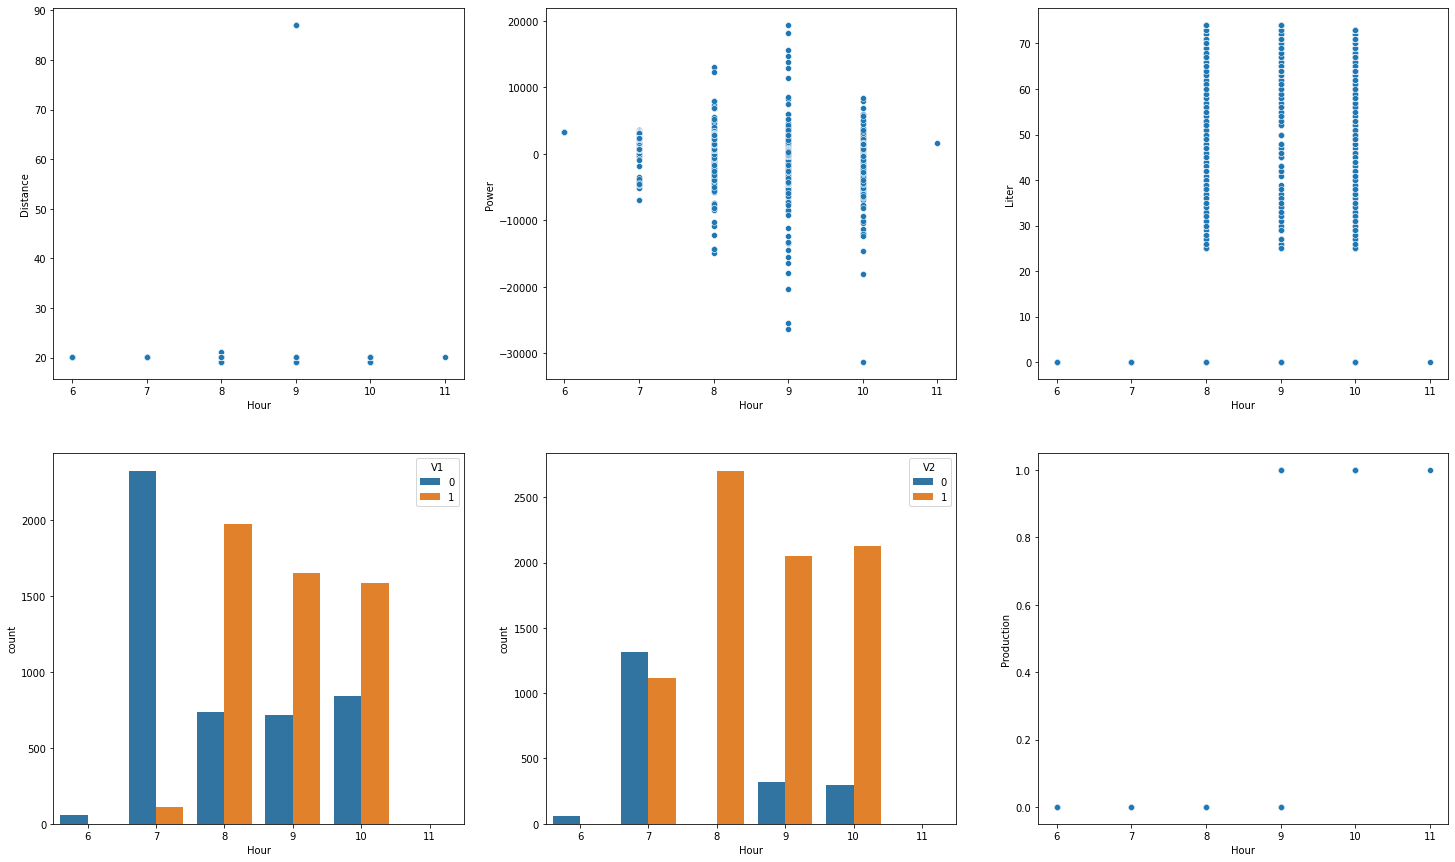

In [ ]:
#YOUR CODE HERE
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 15)) #we create a canvas for our subplots

# we create each individual plot. Please, note how our axs are defined at the end of the each graph. [0,0] is the top left one, while [1,2] is the bottom right one. 
# Remember the indexation in Python

sns.scatterplot(data=df, x=df['DATETIME'].dt.hour, y="Distance", ax=axs[0,0])
sns.scatterplot(x=df['DATETIME'].dt.hour, y='Power', data=df, ax=axs[0,1])
sns.scatterplot(x=df['DATETIME'].dt.hour,y='Liter', data=df, ax=axs[0,2])
sns.countplot(x=df['DATETIME'].dt.hour, hue='V1', data=df, ax=axs[1,0]).legend(title="V1", loc='upper right')
sns.countplot(x=df['DATETIME'].dt.hour, hue='V2', data=df, ax=axs[1,1])
sns.scatterplot(x=df['DATETIME'].dt.hour, y='Production', data=df, ax=axs[1,2])

for i in range(0,3): #iterating through our graphs to give a label to each
    axs[0,i].set(xlabel='Hour')
    axs[1,i].set(xlabel='Hour')

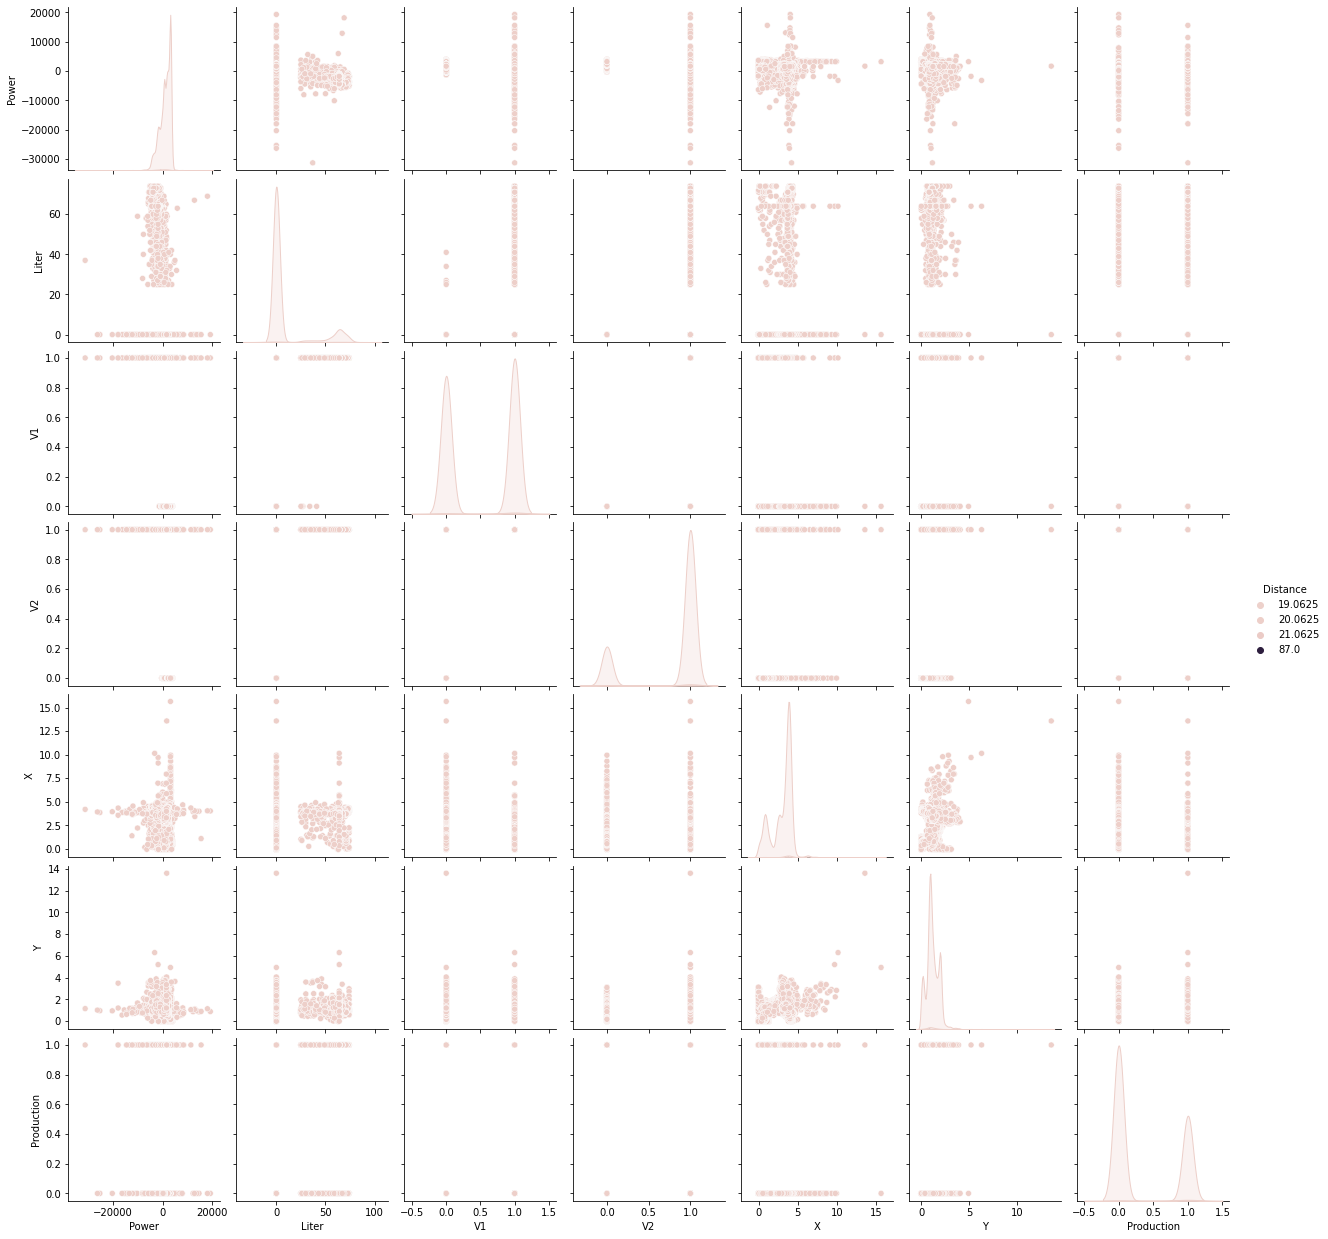

In [ ]:
# importing packages
import seaborn
import matplotlib.pyplot as plt

# pairplot with hue sex
seaborn.pairplot(df, hue ='Distance')
plt.show()

**NOTE:** If you feel completely lost and you have been trying something for a while and it didn't work -- don't feel ashamed to use the solution. This task is not so easy for inexperienced Data Science juniors, yet it's a good lesson 😉

Double-click **here** for the solution.

<!-- Your answer is below:
    
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25, 15)) #we create a canvas for our subplots

# we create each individual plot. Please, note how our axs are defined at the end of the each graph. [0,0] is the top left one, while [1,2] is the bottom right one. 
# Remember the indexation in Python

sns.scatterplot(data=df, x=df['DATETIME'].dt.hour, y="Distance", ax=axs[0,0])
sns.scatterplot(x=df['DATETIME'].dt.hour, y='Power', data=df, ax=axs[0,1])
sns.scatterplot(x=df['DATETIME'].dt.hour,y='Liter', data=df, ax=axs[0,2])
sns.countplot(x=df['DATETIME'].dt.hour, hue='V1', data=df, ax=axs[1,0]).legend(title="V1", loc='upper right')
sns.countplot(x=df['DATETIME'].dt.hour, hue='V2', data=df, ax=axs[1,1])
sns.scatterplot(x=df['DATETIME'].dt.hour, y='Production', data=df, ax=axs[1,2])

for i in range(0,3): #iterating through our graphs to give a label to each
    axs[0,i].set(xlabel='Hour')
    axs[1,i].set(xlabel='Hour')

-->

-----------------------------------------

As for the GPS data let's use a simple scatter plot and give it hue based on the row index. Refer to [Seaborn scatter plot docs](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) if needed.

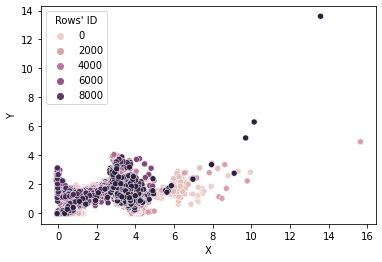

In [ ]:
#YOUR CODE HERE
sns.scatterplot(data=df, x="X", y="Y", hue=df.index).legend(title="Rows' ID")

Double-click **here** for the solution.

<!-- Your answer is below:
    
sns.scatterplot(data=df, x="X", y="Y", hue=df.index).legend(title="Rows' ID")

-->

### Task 1.7. Note your findings

The purpose of this lab is OBerA, and this "... is all about automatic detection of the changeover in production at SMEs...". Based on the information found here we have that the datasets have outliers, which will have to be dealt with before we can move forward.

### Task 1.8. Correlation matrix

The best way to see if any features of our data rely on other features is to observe a correlation matrix. Luckily, it is very easy to do in pandas as you can just use `.corr()` method. [Documentation here.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)

In [ ]:
#YOUR CODE HERE
df.corr()

,Distance,Power,Liter,V1,V2,X,Y,Production
Distance,1.000000,-0.006066,-0.012524,0.012028,0.005743,0.007630,-0.007678,-0.021545
Power,-0.006066,1.000000,-0.547705,-0.526182,-0.375180,-0.310923,0.019892,-0.297440
Liter,-0.012524,-0.547705,1.000000,0.392768,0.209891,0.242322,-0.040947,0.224417
V1,0.012028,-0.526182,0.392768,1.000000,0.532200,0.349275,0.031359,0.159994
V2,0.005743,-0.375180,0.209891,0.532200,1.000000,0.575608,0.279377,0.051372
X,0.007630,-0.310923,0.242322,0.349275,0.575608,1.000000,0.201748,-0.105809
Y,-0.007678,0.019892,-0.040947,0.031359,0.279377,0.201748,1.000000,-0.111131
Production,-0.021545,-0.297440,0.224417,0.159994,0.051372,-0.105809,-0.111131,1.000000


Double-click **here** for the solution.

<!-- Your answer is below:
    
df.corr()

-->

### Task 1.9. Boxplot of Power column

As we saw in the task 1.5 the distribution of Power values is rather wide as well as the range between min and max values. For this let's create a [box plot](https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers) for the Power column and see how many outliers we have.
The easiest way is to use the **Seaborn** library for this. Head over to Google or [Seaborn](https://seaborn.pydata.org/index.html) website to find how to make a box plot.

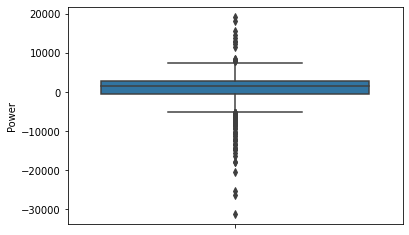

In [ ]:
#YOUR CODE HERE
box_plot = sns.boxplot(y=df["Power"])

Double-click **here** for a **HINT**.

<!-- Your hint is below:
    
https://seaborn.pydata.org/generated/seaborn.boxplot.html

-->

Double-click **here** for the solution.

<!-- Your answer is below:
    
sns.boxplot(data=df['Power'])

-->

## Data Preparation

### Task 2.1. Data normalization

Now, having the idea of how our data looks like, it is time to prepare it for the use in modeling. For this, we need to make sure that the data has a comparable scale which, at the moment, it doesn't. (Remember those Power values? ~19000 Watts vs 20 cm vs 0/1 door sensor)
So, let's try to bring our data to the same scale.

#### Task 2.1.1. Normalize Distance column

So what do we know about the Distance column? It represent the distance sensor which basically registers whether the door to the tool magazine is open or closed. ~20 cm means it is closed. More than that means it is open.
So, let's have a look at exact values the distance sensor registers. Let's use `.value_counts()` method on this column. [Documentation here.](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [ ]:
#YOUR CODE HERE
df['Distance'].value_counts()

20.0625    9859
19.0625     123
87.0000       3
21.0625       1
Name: Distance, dtype: int64

Double-click **here** for the solution.

<!-- Your answer is below:
    
df['Distance'].value_counts()

-->

Hopefully you get something that looks like this:

- 20.0625    9859
- 19.0625     123
- 87.0000       3
- 21.0625       1
- Name: Distance, dtype: int64

As you can see when the door is closed it indeed has a value in range of 19-21 cm in terms of distance. The uncertainty is easily explained as the door handle to which the sensor is ponted has a round shape, therefore a deviation of +/- 1 cm is no surprise.
However, we see, that when the door is open, the distance is much higher. Let's use this and change our distance values similarly to other door sensors.
Let's say when distance is lower than 80 cm we assign it the value of 0 and when the distance is higher than 80 cm we assign it the value of 1.

**HINT:** Use `.loc[]` property of the dataframe and [this reference](https://www.kite.com/python/answers/how-to-change-values-in-a-pandas-dataframe-column-based-on-a-condition-in-python) as an example.

In [ ]:
#YOUR CODE HERE
df.loc[df.Distance < 80, 'Distance'] = 0
df.loc[df.Distance > 80, 'Distance'] = 1

Double-click **here** for the solution.

<!-- Your answer is below:
    
df.loc[df.Distance < 80, 'Distance'] = 0
df.loc[df.Distance > 80, 'Distance'] = 1

-->

Check the `.value_counts()` again to make sure it worked. Hopefully, you see something like this now:

- 0.0    9983
- 1.0       3
- Name: Distance, dtype: int64

Considering how many values of 1 we have per almost 10k entries, do you think this sensor has a lot of influence on the changeover process?

#### Task 2.1.2. Getting rid of outliers in Power column.

As you have seen in Task 1.9 there are outliers in the Power column. Please, refer to the [box plot explanation](https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers) to understand what is considered an outlier.

In short: anything that is located below (Q1 - 1.5 x IQR) or above (Q3 + 1.5 x IQR) is considered an outlier.
With this in mind, let's define our Q1, Q3 and IQR.

In [ ]:
Q1 = df['Power'].quantile(0.25)
Q3 = df['Power'].quantile(0.75)
IQR = Q3 - Q1

Now, with this we can look for these outliers in our dataframe.

In [ ]:
df[df['Power'] < Q1 - 1.5 * IQR]

,DATETIME,Distance,Power,Liter,V1,V2,X,Y,Production
1470,2021-03-31 07:34:08,0.0,-6954.02,0,1,1,3.79279,0.744948,0
3072,2021-03-31 08:13:26,0.0,-8412.23,0,1,1,3.89733,0.993281,0
3240,2021-03-31 08:17:04,0.0,-5513.35,0,1,1,3.99878,1.219990,0
3242,2021-03-31 08:17:06,0.0,-10847.70,0,1,1,3.97601,1.248950,0
3279,2021-03-31 08:17:56,0.0,-14935.60,0,1,1,4.00472,0.942551,0
...,...,...,...,...,...,...,...,...,...
9616,2021-03-31 10:49:07,0.0,-11994.60,0,1,1,3.74727,1.098110,1
9879,2021-03-31 10:55:39,0.0,-6014.24,59,1,1,0.47700,0.288522,1
9951,2021-03-31 10:57:21,0.0,-12290.70,0,1,1,3.68171,0.782728,1
9958,2021-03-31 10:57:30,0.0,-6359.49,0,1,1,3.70016,0.944855,1


In [ ]:
df[df['Power'] < Q1 - 1.5 * IQR].shape

(95, 9)

Hopefully, you see that we have 95 such outliers.

Now, your task is to **do the same for the outliers above Q3 + 1.5 x IQR and then you shall drop all of them from our dataframe**.

**HINT:** You might want to have a look at [`.drop()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), [`.reset_index()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html) (they are clickable). Also, do not forget about such parameters as "inplace" (in both) and "drop" (in reset_index).

In [ ]:
#YOUR CODE HERE
df.drop(df[df['Power'] < Q1 - 1.5 * IQR].index, inplace=True)
df.drop(df[df['Power'] > Q3 + 1.5 * IQR].index, inplace=True)
df.reset_index(drop=True, inplace=True)

Double-click **here** for the solution.

<!-- Your answer is below:
    
df.drop(df[df['Power'] < Q1 - 1.5 * IQR].index, inplace=True)
df.drop(df[df['Power'] > Q3 + 1.5 * IQR].index, inplace=True)
df.reset_index(drop=True, inplace=True)

-->

#### Task 2.1.3. Data normalization using MinMaxScaler

One of the popular methods of normalizing data is provided by scikit-learn and it is called MinMaxScaler. [Documentation here.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) It allows to scale each feature to a given range (default is 0-1).

**NOTE:** [Here is a great article](https://www.journaldev.com/45109/normalize-data-in-python) showing how to use MinMaxScaler (scroll down a bit). We would use it as a reference.

First, let's import MinMaxScaler from scikit-learn:

In [ ]:
#YOUR CODE HERE
from sklearn.preprocessing import MinMaxScaler

Double-click **here** for the solution.

<!-- Your answer is below:
    
from sklearn.preprocessing import MinMaxScaler

-->

Next, let's create a scaler object using the imported MinMaxScaler.

In [ ]:
#YOUR CODE HERE
scaler = MinMaxScaler()

Double-click **here** for the solution.

<!-- Your answer is below:
    
scaler = MinMaxScaler()

-->

Now, your task is to normalize **ALMOST** the entire dataframe. Why almost? Well, perhaps, there is a column(s) that should not be normalized? ;)

**NOTE:** Use [this link](https://www.journaldev.com/45109/normalize-data-in-python) as a reference. (same article as above)

In [ ]:
#YOUR CODE HERE
names = df.columns[1:]
d = scaler.fit_transform(df[df.columns[1:]])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Distance,Power,Liter,V1,V2,X,Y,Production
0,0.0,0.666051,0.0,0.0,0.0,0.082785,0.086355,0.0
1,0.0,0.667159,0.0,0.0,0.0,0.091721,0.079736,0.0
2,0.0,0.666942,0.0,0.0,0.0,0.095520,0.055729,0.0
3,0.0,0.666390,0.0,0.0,0.0,0.084288,0.042427,0.0
4,0.0,0.666850,0.0,0.0,0.0,0.078384,0.030273,0.0


Double-click **here** for a **HINT**.

<!-- Your hint is below:
    
If you want to get the list of column names, you could use the following attribute .columns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html

-->

Double-click **here** for a **HINT #2**.

<!-- Your hint is below:
    
Perhaps, you do not want to select all the columns for normalization Therefore dataframe slicing can prove to be useful.
Something like:

df[1:4]  <---- NOT A SOLUTION!!!

-->

Double-click **here** for a **HINT #3**.

<!-- Your hint is below:
    
You might want to learn more about .fit_transform method
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.fit_transform

-->

Double-click **here** for the solution.

<!-- Your answer is below:
    
names = df.columns[1:]
d = scaler.fit_transform(df[df.columns[1:]])
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

-->

We hope the dataframe you got looks similar to this one (**NOT AN EXACT SOLUTION**):

|    | DATETIME            |   Distance |    Power |   Liter |   V1 |   V2 |         X |         Y |   Production |
|---:|:--------------------|-----------:|---------:|--------:|-----:|-----:|----------:|----------:|-------------:|
|  0 | 2021-03-31 06:58:28 |          0 | 0.683165 |       0 |    0 |    0 | 0.0827855 | 0.0863547 |            0 |
|  1 | 2021-03-31 06:58:29 |          0 | 0.683442 |       0 |    0 |    0 | 0.0917214 | 0.0797358 |            0 |
|  2 | 2021-03-31 06:58:30 |          0 | 0.683388 |       0 |    0 |    0 | 0.0955201 | 0.0557294 |            0 |
|  3 | 2021-03-31 06:58:31 |          0 | 0.68325  |       0 |    0 |    0 | 0.084288  | 0.0424267 |            0 |
|  4 | 2021-03-31 06:58:33 |          0 | 0.683365 |       0 |    0 |    0 | 0.0783845 | 0.0302728 |            0 |

#### Task 2.2. Data and feature selection

The final stage of data preparation is to select the data to teach the model. We will convert our selection to Numpy representation using `.values` attribute.
[Documentation here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)

**NOTE:** As you might have guessed already, our timestaps cannot be a feature and therefore have not to be included.

By convention we call the arrays:

- X --> for independent variables (Note: the 'x' is a capital 'X')
- y --> for dependent variables (Note: the 'y' is lower case 'y')

In [ ]:
#Independent vars
X = scaled_df[scaled_df.columns[1:7]].values #We dont care about 'Datetime' or 'Production'
X[0:5] #to check the result

array([[0.66605117, 0.        , 0.        , 0.        , 0.08278546,
        0.0863547 ],
       [0.66715859, 0.        , 0.        , 0.        , 0.09172145,
        0.07973578],
       [0.66694247, 0.        , 0.        , 0.        , 0.09552012,
        0.05572942],
       [0.66638955, 0.        , 0.        , 0.        , 0.08428802,
        0.04242669],
       [0.66685019, 0.        , 0.        , 0.        , 0.07838449,
        0.03027281]])

In [ ]:
#Dependent vars
y = scaled_df[['Production']].values # Understand this sintax
y[0:5] #to check the result

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

Double-click **here** for the solution.

<!-- Your answer is below:
    
X = scaled_df[scaled_df.columns[1:7]].values
y = scaled_df[['Production']].values

-->

Just execute the cell below to make sure our array has a correct shape.

In [ ]:
y = y.ravel() # we need to convert our y values into an array that has a shape (n, )

### Task 2.3. Splitting the data into train and test sets.

As we are about to do more-or-less proper machine learning in a small amount of time, we would need to split the data into training and test sets to avoid problems with our model.

Luckily, scikit-learn has an easy-to-use function just for this which is called `.train_test_split()`. [Documentation here.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

So, please, import the `.train_test_split()` first.

In [ ]:
#YOUR IMPORT HERE
import numpy as np
from sklearn.model_selection import train_test_split

Double-click **here** for the solution.

<!-- Your answer is below:
    
from sklearn.model_selection import train_test_split

-->

Next, let's split the data using the following parameters:

- test_size = 0.2
- random_state = 42

In [ ]:
#YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Double-click **here** for the solution.

<!-- Your answer is below:
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

-->

## Modeling

### Task 3.1. Model

With all the data prepared, we can start modeling. At last!
As it was stated before, here comes the moment where you can experiment however you like and try a model whatever you want: Logistic Regression, Neural Networks, SVM, Decision Trees...

Decision tree sounds like a good idea. This is what **WE** would proceed with. **YOU** can try any other model and this is highly encouraged. Yet if you are unsure how to proceed, or do not have much time or you also like an idea of a Decision tree -- let's go!

Just as always, first of all, we need to import a [Decision tree from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [ ]:
#YOUR IMPORT HERE
from sklearn.tree import DecisionTreeClassifier

Double-click **here** for the solution.

<!-- Your answer is below:
    
from sklearn.tree import DecisionTreeClassifier

-->

Now, we need to create a Decision Tree object which we will call `clf`. Let's use default settings for now.

In [ ]:
#YOUR CODE HERE
clf = DecisionTreeClassifier()

Double-click **here** for the solution.

<!-- Your answer is below:
    
clf = DecisionTreeClassifier()

-->

Next we *fit* our Decision tree with the training data. Refer to the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) if needed.

In [ ]:
#YOUR CODE HERE
trained_clf = clf.fit(X_train,y_train)

Double-click **here** for a **HINT**.

<!-- Your answer is below:
    
Have a look at the `fit()` method. (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit)

-->

Double-click **here** for the solution.

<!-- Your answer is below:
    
trained_clf = clf.fit(X_train,y_train)

-->

Good job! Our model is trained and now we can have a look at it! Specifically, at its ability to predict classes.

Hence, we need to create a tree with our *predictions* and test how accurate they are. Do not forget to pass in the test data! Refer to the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) again if needed or use a hint.

In [ ]:
#YOUR CODE HERE
pred_clf = clf.predict(X_test)

Double-click **here** for a **HINT**.

<!-- Your answer is below:
    
Have a look at the `predict()` method. (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

-->

Double-click **here** for the solution.

<!-- Your answer is below:
    
pred_clf = clf.predict(X_test)

-->

So, at this point you are probably dying to see the results of your work. Like we have just built a tree! Let's have a look at it by plotting it. Luckily for us, there is a built-in function that allows us to do just that. It is called `plot_tree()` and you can access its [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html).

We will give you a hand here and pass in **SOME** parameters. Please, pass in the others yourself!

<span style="color:red"> IMPORTANT: </span> Execution of the next cell might take a while. Up to a minute probably. So do not worry.

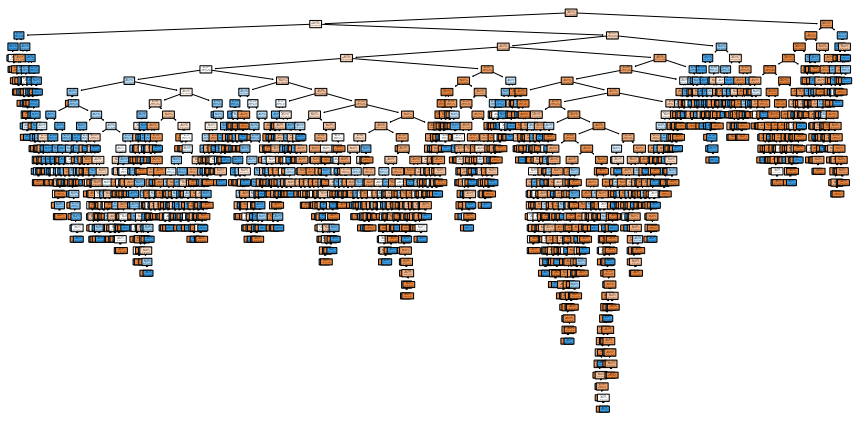

In [ ]:
#plotting our decision tree

from sklearn.tree import plot_tree #import the function from scikit-learn

plt.figure(figsize=(15, 7.5)) #controlling the size of the picture in the output

plot_tree(clf, #here should be your fitted model instead of "pass"
          filled=True,
          rounded=True,
          class_names= ["No Production", "Production"] , #here should be the names of your classes
          feature_names= scaled_df[1:8].columns); #here should be the names of your features

Double-click **here** for the solution.

<!-- Your answer is below:

from sklearn.tree import plot_tree
    
plt.figure(figsize=(15, 7.5))

plot_tree(trained_clf,
          filled=True,
          rounded=True,
          class_names=["No Production", "Production"],
          feature_names=scaled_df[1:8].columns);

-->

At this moment, you are probably thinking: "Woah! This is a BIG tree!". Whether you do or you don't -- this is indeed a BIG tree. Let's have a look at the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


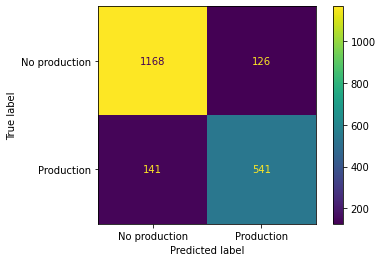

In [ ]:
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
plot_confusion_matrix(trained_clf, X_test, y_test, display_labels=["No production", "Production"])

Okay, hopefully, your model is performing not too bad. Let's have a look at accuracy and f1 scores. For this we would need to import the `classification_report()` and print it. [Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [ ]:
#YOUR CODE HERE
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      1294
         1.0       0.81      0.79      0.80       682

    accuracy                           0.86      1976
   macro avg       0.85      0.85      0.85      1976
weighted avg       0.86      0.86      0.86      1976



Double-click **here** for the solution.

<!-- Your answer is below:

from sklearn.metrics import classification_report    

print(classification_report(y_test, pred_clf))

-->

Whatever result you got, it might be a good idea to check it with [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) (CV for short). Cross-validation is usually a good idea to ensure no overfitting occurs. Especially, in decision trees which are prone to overfitting. Let's quickly do that and see if we can obtain better results.

You can play around with the number of *k*-s to see if the result is better.

In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y, cv=5)
print(f"Average CV score: {np.mean(cv_scores)}")

Average CV score: 0.6415397427356121


Do you have an idea why we got such results? What should be changed? What issues can the nature of our data set cause? Which metrics shall we use then?

Overfitting may be one of the reasons it has such low percentage, or the handling of outliers. 

--------------------------------------

## The end!

At this point you have reached the end of this lab! Congratulations! We hope it was not too hard, but, honestly, it was pretty hard for people who don't have too much experience in Python and Data Science. So, if you found it difficult and had to use tips or solutions -- it's completely fine! As long, as you were doing your best, you did a great job!

However, feel free to give us feedback on how to improve this lab. Thank you!